In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.rcParams["font.family"] = 'Malgun Gothic'

# 12장 파이썬 모델링 라이브러리
* 모델링 도구
  * statsmodels
    * https://www.statsmodels.org/stable/index.html
  * scikit-learn(사이킷런)
    * https://scikit-learn.org/stable

## 12.1 판다스와 모델 코드의 인터페이스
* 학습 모델링 개발 과정

1. 데이터 로딩: 판다스를 사용하여 데이터를 로드하고 데이터프레임으로 변환
2. 데이터 전처리: 판다스를 사용하여 데이터를 전처리
    * 피처 엔지니어링(feature engineering)
3. 데이터셋 분리
4. 모델 선택
5. 모델 훈련: numpy 배열을 모델 훈련에 사용
6. 모델 평가: scikitlearn을 이용하여 모델 성능을 평가
7. 모델 예측: numpy 배열을 사용하여 모델을 통해 예측


* feature engineering
    * 기계 학습 모델의 성능을 향상시키기 위해 데이터의 원시 특징을 변환하는 프로세스
    * 피처 엔지니어링 기술
      * 결측값 처리
      * 이상치 처리
      * 피처 스케일링
        * 모델이 모든 피처에 동일한 가중치를 부여
        * 피처 스케일링 기술
          * 표준화: -1과 1사이에 속하도록 표준화. 피처의 평균을 0으로, 표준 편차를 1로 조정
          * 정규화: 피처의 값이 0과 1 사이에 있도록 조정
      * 피처 변환
        * 피처 변환은 피처의 분포를 변경하는 프로세스
        * 피처 변환 기술
          * 로그 변환: 피처의 값을 로그로 변환
          * 제곱근 변환: 피처의 값을 제곱근으로 변환
      * 피처 선택
        * 피처 선택은 모델 학습에 사용할 피처를 선택하는 프로세스
        * 과적합을 줄이는 데 도움이 됨
        * 피처 선택 기술
          * 상관 관계 분석: 독립 변수 간 상관 관계가 높은 피처를 제거
          * 통계적 유의성 검정: 통계적으로 유의미하지 않은 피처를 제거
          * 머신 러닝 알고리즘: 피처 중요도를 평가하는 머신 러닝 알고리즘을 사용하여 피처를 선택
      * 피처 생성
        * 피처 생성은 새로운 피처를 만드는 프로세스
        * 이는 모델이 데이터의 패턴을 더 잘 학습하는 데 도움
        * 피처 생성 기술
          * 교차 피처: 기존 피처를 결합하여 새로운 피처를 생성
          * 주성분 분석: 기존 피처의 주성분을 추출하여 새로운 피처를 생성
  

* 교차 검증(Cross-validation)
  * 교차 검증은 데이터셋을 여러 개의 폴드(fold)로 나누고, 각 폴드를 한 번씩 평가 데이터로 사용하는 방법
  * 교차 검증의 장점
      1) 모델의 성능을 정확하게 평가할 수 있다.
      2) 과적합을 방지할 수 있다.
      3) 하이퍼파라미터 튜닝에 사용할 수 있다.
  * 교차 검증의 단점
    * 시간이 오래 걸린다.
    * 계산 자원이 많이 필요

# [ 선형 회귀분석 문제 ]
* scikit-learn 패키지을 사용하여 가상의 회귀분석 문제 이해하기
* from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
* from sklearn import linear_model

### [Method 1] 단순 선형회귀 구현 : LinearRegression 클래스에 **경사하강법**과 학습 원리가 구현됨

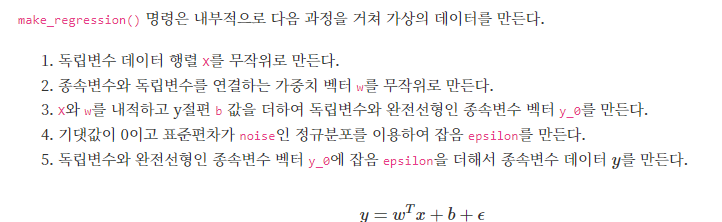

In [ ]:
# ex
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 중요
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# 1. 데이터셋
X, y, w = make_regression(
    n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=0 ) # bias = y절편, noise = 오차항
X[:5], y[:5], w
X.shape, y.shape
type(X), type(y)

# 데이터 분포
xx = np.linspace(-3, 3, 100) # x축에서 범위(-3,3)에 있는  100개  
y0 = w * xx + 100 #  가설 1
y1 = (w*2) * xx + 150 # 가설 2

plt.plot(xx, y0, "r-", label = "line 1")
plt.plot(xx, y1, "g-", label = "line 2")
plt.scatter(X, y, s=100, label =" dataset ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression line")
plt.legend()
plt.show()

# 2. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

# 3. 모델 선택
model = LinearRegression()

# 4. 모델 학습 : supervise, Learning, training data
model.fit(X_train, y_train) #MSE, SGD
print(model.coef_)
print(model.intercept_)

# 5. 학습 모델을 이용하여 예측
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# 6. 학습 모델 성능 평가 : y_test, y_test_pred
print(f"R2 : {r2_score(y_test, y_test_pred)}, MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"score: {model.score(X_test, y_test_pred)}")



# 7. 데이터 분포와 선형 회귀선 시각화
plt.scatter(X_test, y_test, color = 'green', label='Testing data') # 테스트 데이터 분포
plt.plot(X_test, y_test_pred, color = 'orange', linewidth=2, label='best-fit Regression line')
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression line")
plt.legend()
plt.show()

# 8. 회귀선을 이용하여 미지의 데이터(X= 4)에 대해 예측하기
# 사전 학습된 모델 : 가중치와 절편
w = model.coef_
b = model.intercept_
# 최적화(best-fit) 회귀선, new_data = [-3, 5, ]
new_X = [[-3], [5]] #new_X = [[-3]]

predict = w * new_X + b
print(f"y = {predict.round(0)}, w = {w.round(0)}, b = {b.round(0)}")


### [Method 2] 경사하강법 원리을 구현하여 선형회귀함수의 가중치와 절편을 구하기 
  * 하이퍼파라미터:
    * 학습율
    * 가중치
    * 바이어스
    * 에폭 : 학습을 위해서 전체 데이터를 모두 넣어서 에러를 구하는데 이렇게 전체 데이터를 한 번 사용하는 것을 1 epoch


In [ ]:
# 1. LinearRegression 사용하지 않고 하이퍼파라미터 튜닝
w, b = 0, 0
eta , epoch  = 0.00001, 1000 # 학습율을 매우 작게 줄 경우 -> 수렴하는 시간이 길어진다.
# eta , epoch  = 1.0, 1000 # 학습율을 매우 크게 줄 경우 -> 발산

# 2. 확률적 경사하강법 구현



# 3. 데이터 분포 및 회귀선 시각화



## [심화 프로그래밍 : LinearRegression]
* 선형 회귀 모델을 사용하여 Seaborn의 데이터셋에서 연도와 항공기 승객 수 사이의 상관관계를 분석하고, 이를 이용하여 선형 회귀 모델의 계수와 절편을 구한 후, 예측 점수를 출력하고 결과를 시각화하는 코드를 작성
* features의 개수 : 2개 이상
* 피처 선택 : 종속 변수와 상관도가 50% 이상인 피처 선택

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# flights 데이터셋 로드
flights = sns.load_dataset("flights")

# flights 데이터셋의 정보 출력
print(flights.info())

# flights 데이터셋의 상위 5행 출력
print(flights.head())

#  flights 데이터셋의 결측치 확인
print(flights.describe())

# flights 데이터 셋의 shape을 출력
print(flights.shape)

(1) flights의 groupby() 기능과 sum()메서드를 사용하여 다음과 같이 연도별 이용객의 수를 출력하시오.

In [ ]:
# 피처 선택해서 X, y 설정


(2) 연도 값을 X축으로 하고, 연간 승객의 수를 y축으로 하여 다음과 같은 선 그래프를 그리시오.

In [ ]:
# 1) X축 : 연도 값


# 2)  y축 : 연간 승객의 수


# 3) 시각화
plt.plot(X, y, color='blue', label='passengers')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Line chart : Total Passengers per Year")

(3) 연도별 항공기 승객의 증가 추이를 scatter()을 이용하여 시각화하여라

In [ ]:
plt.scatter(X, y, label = "passengers", color = "red")
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Scatter chart : Total Passengers per Year")
plt.legend()

(4) 연도와 항공기 승객의 수 사이에는 상관관계을 선형회귀 분석으로 모델링하시오.
  * 선형회귀분석을 통해서 선형회귀모델의 계수와 절편을 구하기.
  * 이 선형회귀모델이 입력값(연도)에 대하여 항공기 승객의 수를 예측하는데 얼마나 적합한지 예측점수를 출력

In [ ]:
# 1. linearRegression 모델 선택


# 2. X 데이터 피처 변환 : 1차원 벡터 -> 2차원 배열로 변환


# 3. 모델 학습


# 4. 오차함수 기반 학습 결과로 가중치와 절편 구하기


# 5. 모델 성능 평가



(5) 산점도 그래프와 선형회귀직선을 다음과 같이 한 그래프위에 표시하시오

In [ ]:
# 선형회귀의 가중치와 절편이 데이터의 분포를 제대로 설명하는가 시각화해서 분석하기


(6) 예측 모델의 성능 평가을 하시오

## [심화 프로그래밍 : SGDRegressor]

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드
flights = sns.load_dataset('flights')

# 2. 데이터 전처리
# 1) 연도병별 승객 수를 추출
result = flights.groupby(['year'])['passengers'].sum()

# 2) X, y 정의


# 3) 데이터 스케일링 :  표준화 



# 3. 선형 회귀 모델 선택


# 4. 모델 학습


# 5. 회귀 선의  모델 계수와 절편 출력


# 6. 모델 성능 평가


# 7. 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual passengers')
plt.plot(X, y_pred, color='red', label='Predicted passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Linear Regression: Year vs Passengers')
plt.legend()
plt.show()

# [다중(다변량:multivariate) 선형 회귀분석 문제]
* 고급 데이터 분석
* 상관도 분석 기법을 이용하여 주요 특징을 추출하는 방법을 이해
* 머신러닝을 위하여 훈련데이터와 검증 데이터 분리하는 이유 이해하기

* 최적화 머신 러닝 모델 :
  * 현재 데이터를 잘 설명하는 모델
  * 미래 데이터에 대한 예측 성능이 좋은 모델

* 다변량 선형회귀 분석에서 오차 함수 
    * MSE는 모델의 성능을 평가하는 데 사용되는 손실 함수
    * MSE가 낮을수록 모델의 성능이 좋다.

* 다변량 선형회귀 분석에서 MSE를 최소화하는 것은 모델의 성능을 최적화하는 것을 의미
  * MSE를 최소화하기 위해서는 회귀 계수 벡터를 조정
  * 이는 일반적으로 경사 하강법과 같은 최적화 알고리즘을 사용하여 수행

* 다변량 선형회귀 분석에서 MSE는 모델의 성능을 평가할 때 유일한 지표로 사용해서는 안 됨.
  * MSE는 모델이 몇 개의 데이터 포인트에 대해 큰 오류를 예측하면 MSE가 크게 증가할 수 있다.
  * MSE가 높다고 해서 모델이 항상 나쁜 것은 아니라는 점을 기억하는 것이 중요
  * 모델의 성능을 평가할 때는 MSE와 다른 지표(예: R^2)를 함께 고려하는 것이 좋다.

## [심화 프로그래밍 : LinearRegression]
* Kaggle 사이트의 공개 데이터를 바탕으로 나라별 기대수명을 예측을 할 수 있는 최적화 모델을 만들기
  * 세계보건기구(WHO)에서 내어놓은 나라별 기대수명 데이터
  * 2000년부터 2015년까지 나라별 기대수명과 보건예산, 질병통계, 비만도 등이 정리되어 있음

In [ ]:
import pandas as pd
import seaborn as nss
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

life = pd.read_csv("life_expectancy.csv")
life

* 상관도가 높은 특징을 기반으로 최적의 모형 찾기
  * 기대수명 예측하기
  * 피처 선택: 속성 변수 들 중에서 어떤 변수들을 잘 조합해야 좋은 예측을 할 수 있을까
    * 상관도가(기여도)가 높은 유의한 속성 변수부터 하나씩 추가하는 방법

1.  데이터 탐색

In [ ]:
# 결측값 찾기
import missingno as msno
msno.bar(life)

life.dropna(inplace = True)

2) 범주형 변수 더미화

In [ ]:
dum = pd.get_dummies(life['Country'], prefix='c', dtype=float)
life = pd.concat([life.drop('Country', axis=1), dum], axis =1)
life.head()

In [ ]:
dum = pd.get_dummies(life['Status'], prefix='s', dtype=float)
life = pd.concat([life.drop('Status', axis=1), dum], axis =1)
life.head()

3) 기대수명('Life expectancy')에 관련된 다른 특성들과의 상관계수 값을 출력

4) 기대수명과 특성 분석
* 상관도가 높은 특징들을 추출

In [ ]:
# 시본 라이브러리의 기대수명과 상관도가 높은 5개의 특성에 대한 쌍 그래프 그리기 --- 대각선 모양의 분포
sns.pairplot(life[['Life expectancy', 'Schooling', 'Income composition of resources',\
                   'Adult mortality', 'HIV/AIDS']])
plt.show()

5.  X, y 설정

6) 학습데이터와 평가데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 21)

7) 모델 학습 : LinearRegression

8. 모델 평가

In [ ]:
y_pred= model.predict(X_test)



g = plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Life expectancy")
plt.show()

# [다항회귀모델 문제]
* X값의 범위가 -4에서 4 사이의 값이고, 다음의 3차 방정식을 만족하는 분포를 가지는 y데이터를 생성한다.


* 과재적합 주의
  * 다항 회귀 모델의 항이 많아지고 차수가 커질수록 모델의 표현 능력이 좋아짐  

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 20개의 데이터를 생성하고 시각화
m = 20
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.rand(m,1)

# 20개의 데이터를 학습용 데이터, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.figure(figsize = (6,5))
plt.xlim(-5, 5) # X 의 범위 지정
plt.ylim(-28,50)
plt.plot(X_train, y_train, "b^") #학습용 데이터

# 다항회귀 모델을 만들고 점수와 계수, 절편을 출력
from sklearn.preprocessing import PolynomialFeatures

# 다항 특성이 20개가 되도록 만들기 - 차수가 20인 다항 특성을 생성
poly_features = PolynomialFeatures(degree = 20,\
                                   include_bias = False)
X_poly = poly_features.fit_transform(X_train)

# 모델 학습
model = LinearRegression()
model.fit(X_poly, y_train)
print("다항회귀모델의 함수 = ", model.score(X_poly, y_train).round(2))
print("다항 회귀 모델의 계수 =", model.coef_)
print("다항 회귀 모델의 절편 =", model.intercept_) # 좋은 점수이 나오는 이유는 많은 항의 계수들 덕분에 학습 데이터에 튜닝이 되었기때문에

# 모델 평가
## 테스트 데이터를 다항 회귀 모델의 입력으로 주고 예측 점수를 구하기
X_poly = poly_features.fit_transform(X_test)
print("테스트 데이터에 대한 다항회귀모델의 점수 = ", model.score(X_poly, y_test).round(2))

# 다항 회귀 곡선 그리기
X_new = np.linspace(-4, 4, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

plt.figure(figsize = (7,6))
plt.xlim(-5, 5)
plt.ylim(-28, 50)

#학습용 데이터와 다항 회귀 곡선을 그려보고 테스트 데이터 그리기
plt.plot(X_train, y_train, "b^", label="training data")
plt.scatter(X_test, y_test, c = 'red', s= 200, alpha = 0.4, label = "test data")
plt.plot(X_new, y_new, "g-", label = "Prediction curve")
plt.legend()
plt.savefig("overfitting.jpg")


## [개선 모델]
* 기본 선형 회귀 모델을 최적화하여 예측 성능을 향상시키기 위해 방식을 사용
* 정규화를 추가한 Ridge 회귀 모델을 사용하여 성능을 향상
* Ridge 회귀는 L2 정규화를 통해 모델의 복잡성을 제어하고, 과적합을 방지

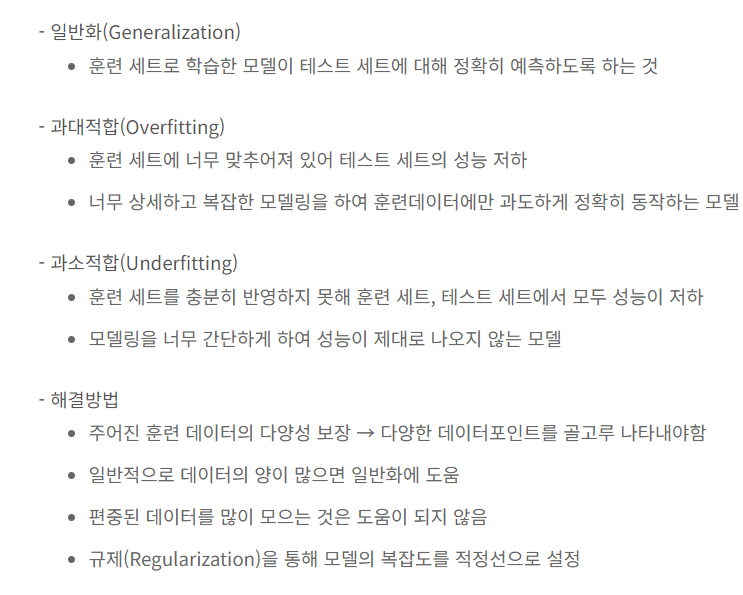

### 릿지 회귀와 alpha 값
* 모든 입력값에 대하여 표준 스케일러를 사용하여 스케일을 적용한 후에 사용
* 이렇게 표준 스케일러를 사용하는 이유는 릿지 회귀 모델이 입력 값의 스케일에 매우 민감하게 수행하기 때문이다.
* 다항 회귀와 Ridge 회귀를 사용하여 데이터의 예측 성능을 평가하고, 다양한 alpha 값에 따른 Ridge 회귀 모델의 성능 변화를 시각화. 이를 통해 최적의 alpha 값을 선택하여 모델의 성능을 최적화할 수 있다.

## 앙상블 프로그래밍 : 주택가격 예측

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# 1. 데이터 로드
housing_train = pd.read_csv("california_housing_train.csv")
housing_test = pd.read_csv("california_housing_test.csv")

#  2. 데이터 탐색
housing_train.isna().sum()
housing_test.isna().sum()
# msno.bar(housing_train)
# plt.show()

# 3. 데이터 전처리
y_train = housing_train["median_house_value"]
y_test = housing_test["median_house_value"]

# 'median_house_value'에 상관도가 높은 특징 추출 및 시각화 : Garbage in Garbage out
result = housing_train.corr().round(2)['median_house_value']
result = np.abs(result).sort_values(ascending = False)[1:4]


plt.figure(figsize=(7,7))
plt.barh(result.index, result.values)
plt.title('Correlation Coef with median_house_value')
plt.xlabel('Corrleation')
plt.ylabel('features')

# 'median_house_value'와 상관도가 높은 4개의 특징에 대한 쌍 그래프 그리기 - 대각선 모양의 분포
features = ['latitude', 'total_rooms', 'median_income']
# features = ['median_income']

# g = sns.pairplot( housing_train[features + ["median_house_value"]])
# g.fig.suptitle("califonia_housing")
# # g.savefig("Housing_price.jpg")
# # plt.show()

# 데이터셋 분리
X_train = housing_train[features].index.to_numpy().reshape(-1,1)
X_test = housing_test[features].index.to_numpy().reshape(-1,1)
y_train = y_train.values
y_test = y_test.values

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).ravel()

# 모델 리스트
models = {'Linear Regression': LinearRegression(),
          'SGD Regression': SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.005),
          'Ridge Regression' : Ridge(alpha = 10)}

# 모델 학습 및 평가

for name, model in models.items():
  model.fit(X_train_scaled, y_train_scaled)
  y_pred_scaled = model.predict(X_test_scaled)
  y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  print(f"r2:{r2}, mse:{mse}")


# 교차 검증을 통한 평가
print("\nCross-validation scores:")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{name} - Mean R-squared (R2) Score: {np.mean(scores)}")

# #  결과 시각화
# plt.figure(figsize=(10, 6))
# plt.scatter(X_test, y_test, color='blue', label='Actual price')
# plt.plot(X_test, y_pred_baseline, color='red', label= "LinearRegression")
# plt.plot(X_test, y_pred, color='green', label= "SGDRegressor")

# plt.xlabel('Actual Price')
# plt.ylabel('Predicted Price')
# plt.title('Linear Regression: Year vs Housing')
# plt.legend()
# plt.show()

